# pu_pmsm

> per unit equations of pmsm and their corresponding torque-speed profiles

In [ ]:
#| default_exp pu_pmsm

In [ ]:
#| hide
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt

### pmsms per unit analysis

Ideal PMSM model in p.u ignoring resistance

$V = \omega \sqrt{ (\lambda_m - L_d i_d )^2 + (L_q i_q )^2 }$  
$T = \dfrac{3 p}{2} [\lambda_m i_q + (L_q - L_d)i_q i_d]$  
$i_d = I \sin(\gamma)$  
$i_q = I \cos(\gamma)$

### Theory: spm pu analysis implementation
spm class provides the ideal per unit capability of the machine defined by two parameters   
1. flux linkage ($\lambda_m$) = phi_m  
2. inductance ($L_d = L_q = L$) = lpu    

SPM achieves maximum torque per ampere with $\gamma = 0$.   
At base speed, $V$, $\omega$ have 1 p.u value.    
Considering these SPM specific constraints at base speed, $\lambda_m$ and $L$ are bound by    
$1 = \sqrt{\lambda_m^2 + L^2 }$     

In this implementation, SPM machine is characterized by just $L$ i.e $lpu$ as input. $\lambda_m$ is calculated using the above constraint.   

In [ ]:
#| export
class spm():
    def __init__(self, phi_m):
        self.lpu = np.sqrt(1-phi_m**2)
        self.phi_m = phi_m
        self.Vb = 0
        self.Pb = 0
        self.wb = 0
        self.speed = []
        self.torque = []
        self.voltage = []
        self.current = []
        self.gamma = []
        self.power = []
        self.values = dict.fromkeys(['speed', 'torque', 'power'])
            
    def motor_puprofile(self, gamma_limit = 85):
        """ this method calculates the per unit profile of the machine with current angle limit of 85 degrees
        """
        gamma_deg = 0
        gamma = gamma_deg*np.pi/180
        # constant torque region
        for o in np.arange(0,1.1,0.1):
            v = o * np.sqrt( (self.phi_m - np.sin(gamma)*self.lpu)**2 + (self.lpu * np.cos(gamma))**2 )
            t = self.phi_m * np.cos(gamma)
            p = t*o
            self.speed.append(o)
            self.voltage.append(v)
            self.gamma.append(gamma)
            self.torque.append(t)
            self.power.append(p)
        # constant voltage region
        for gamma_deg in range(1,85):
            gamma = gamma_deg*np.pi/180
            o = 1/np.sqrt( (self.phi_m - np.sin(gamma)*self.lpu)**2 + (self.lpu * np.cos(gamma))**2 )
            t = self.phi_m * np.cos(gamma)
            p = t*o
            self.speed.append(o)
            self.voltage.append(v)
            self.gamma.append(gamma_deg)
            self.torque.append(t)
            self.power.append(p)
    
    def motor_profile(self, Vb, Pb, wb):
        """This method takes Vb, Pb, wb as the base values for line voltage, KVA rating of the machine, base speed respectively
        """
        self.Vb = Vb
        self.Pb = Pb
        self.wb = wb
        Tb = Pb/(2*np.pi*wb/60)
        self.values['speed'] = np.array(self.speed)*wb
        self.values['torque'] = np.array(self.torque)*Tb
        self.values['power'] = np.array(self.power)*Pb
        
    
    def plot_puprofile(self):
        """ plots the motor performance profile in p.u
        """
        fig, axs = plt.subplots(3)
        fig.set_figheight(8)
        axs[0].plot(self.speed, self.torque)
        axs[0].set_title('torque vs speed')
        axs[1].plot(self.speed, self.power)
        axs[1].set_title('power vs speed')
        axs[2].plot(self.speed, self.gamma)
        axs[2].set_title('gamma vs speed')
        
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()
        
        plt.tight_layout()
        plt.show()
    
    def plot_profile(self):
        """ plots the motor performance profile in actual values
        """       
        fig, axs = plt.subplots(3)
        fig.set_figheight(8)
        axs[0].plot(self.values['speed'], self.values['torque'])
        axs[0].set_title('torque vs speed')
        axs[1].plot(self.values['speed'], self.values['power'])
        axs[1].set_title('power vs speed')
        axs[2].plot(self.values['speed'], self.gamma)
        axs[2].set_title('gamma vs speed')
        
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()
        
        plt.tight_layout()
        plt.show()

In [ ]:
show_doc(spm.motor_puprofile)

---

### spm.motor_puprofile

>      spm.motor_puprofile (gamma_limit=85)

this method calculates the per unit profile of the machine with current angle limit of 85 degrees

In [ ]:
show_doc(spm.motor_profile)

---

### spm.motor_profile

>      spm.motor_profile (Vb, Pb, wb)

This method takes Vb, Pb, wb as the base values for line voltage, KVA rating of the machine, base speed respectively

In [ ]:
show_doc(spm.plot_puprofile)

---

### spm.plot_puprofile

>      spm.plot_puprofile ()

plots the motor performance profile in p.u

In [ ]:
show_doc(spm.plot_profile)

---

### spm.plot_profile

>      spm.plot_profile ()

plots the motor performance profile in actual values

### spm class use: example

Machine profile with:       
magnet flux linkage = 0.8 p.u       
line-line base voltage = 42 V       
base power value (available KVA) = 7000 W   
base speed = 2500 rpm

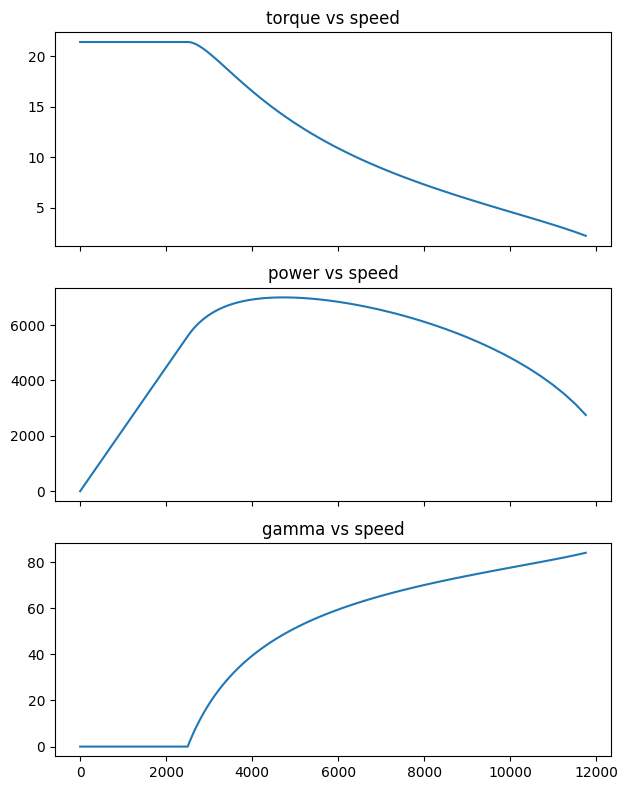

In [ ]:
#| hide_output
M1 = spm(0.8)
M1.motor_puprofile()
M1.motor_profile(42, 7000, 2500)
M1.plot_profile()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()